# Simulación del Examen (Core)

In [394]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/simulacion_examen.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


## Limpieza

In [395]:
# Se ven los principales resultados
data.head()

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3


In [396]:
# Se ve la info general del dataset para entender si hay nulos y los tipos de datos están correctos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             300 non-null    int64 
 1   app_version         300 non-null    object
 2   platform            300 non-null    object
 3   session_duration    300 non-null    int32 
 4   number_of_sessions  300 non-null    int32 
 5   country             300 non-null    object
 6   user_feedback       300 non-null    int32 
dtypes: int32(3), int64(1), object(3)
memory usage: 13.0+ KB


In [397]:
# Se revisa para ver si hay duplicados
data.duplicated().sum()

np.int64(0)

In [398]:
# Se valida cantidad de duplicados por cada columna
data.isna().sum()

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64

No hay duplicados

In [399]:
# Se cambia el tipo de dato de la columna app_version, de object a float
data['app_version'] = data['app_version'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             300 non-null    int64  
 1   app_version         300 non-null    float64
 2   platform            300 non-null    object 
 3   session_duration    300 non-null    int32  
 4   number_of_sessions  300 non-null    int32  
 5   country             300 non-null    object 
 6   user_feedback       300 non-null    int32  
dtypes: float64(1), int32(3), int64(1), object(2)
memory usage: 13.0+ KB


In [400]:
# Se valida si hay inconsistencia en los datos de platform
data['platform'].unique()

array(['Android', 'iOS'], dtype=object)

In [401]:
# Se valida si hay inconsistencia en los datos de country
data['country'].unique()

array(['France', 'UK', 'Canada', 'Germany', 'Mexico', 'USA', 'Spain',
       'Italy'], dtype=object)

In [402]:
# Se ven los datos estadisticos del dataset para ver si podría haber valores atipicos o se encuentra dentro de un comportamiento normal
data.describe()

,user_id,app_version,session_duration,number_of_sessions,user_feedback
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1.155000,95.840000,9.596667,2.926667
std,86.746758,0.113363,51.922773,5.672853,1.449699
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,75.750000,1.100000,51.250000,5.000000,2.000000
50%,150.500000,1.200000,100.500000,9.000000,3.000000
75%,225.250000,1.300000,141.250000,15.000000,4.000000
max,300.000000,1.300000,179.000000,19.000000,5.000000


## Exploracion

### Gráficos Univariados

{'whiskers': [<matplotlib.lines.Line2D at 0x2ad90d8ae10>,
 'caps': [<matplotlib.lines.Line2D at 0x2ad90d8b3b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ad90c51f40>],
 'medians': [<matplotlib.lines.Line2D at 0x2ad90d8b920>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ad90d8bbf0>],
 'means': []}

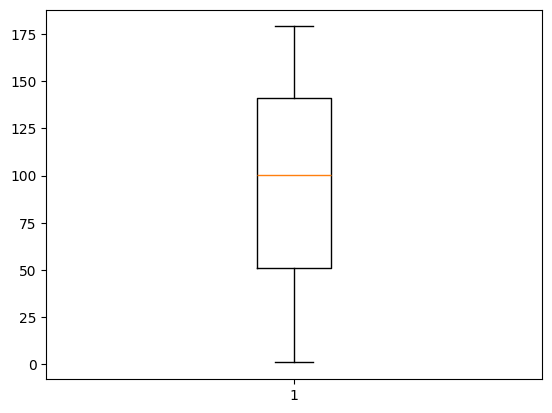

In [403]:
# Se grafica el boxplot por la duracion de las sessiones para ver si hay outliers 
plt.boxplot(data['session_duration'])

No se encuentran outliers

In [404]:
# Se obtiene los datos para empezar a graficar un grafico de torta
datos_plataforma = data.groupby('platform')['user_id'].count()
plataforma = datos_plataforma.index
datos_plataforma = datos_plataforma.values
print(plataforma)
print(datos_plataforma)


Index(['Android', 'iOS'], dtype='object', name='platform')
[137 163]


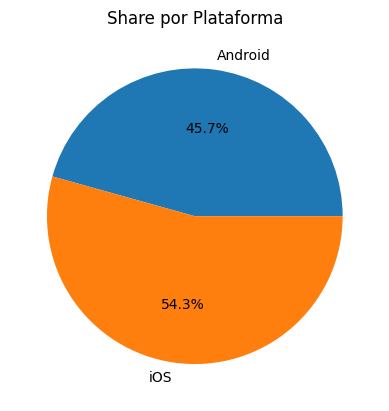

In [405]:
# Grafico de torta

# Se cargan los datos
labels = plataforma  # Etiquetas para cada segmento del gráfico. Cada etiqueta corresponde a una porción de la torta.
sizes = datos_plataforma  # Tamaño de cada segmento. Estos valores representan la cantidad o porcentaje que se va a graficar para cada plataforma.

# Crear gráfico de torta
plt.pie(
    sizes,  # Lista de valores que representan el tamaño de cada segmento.
    labels=labels,  # Etiquetas de cada segmento, especificadas en la lista `labels`.
    autopct="%1.1f%%"  # Muestra los porcentajes de cada segmento en el gráfico con un decimal.
    # %1.1f%% muestra el porcentaje en formato de un decimal, como "50.0%" o "23.5%".
)

# Título
plt.title("Share por Plataforma")  # Agrega un título en la parte superior del gráfico.

# Mostrar gráfico
plt.show()  # Muestra el gráfico en pantalla.


Se puede ver que hay más usuarios de iOS que de Android

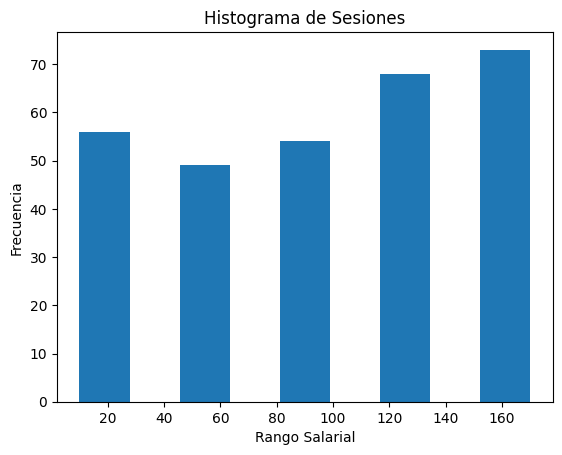

In [406]:
# Histograma
datos = data['session_duration']  # Se cargan los datos

plt.hist(datos, bins=5, rwidth=0.5)  # bins define el número de intervalos, rwidth ajusta el ancho de las barras

# Etiquetas y título
plt.xlabel("Rango Salarial")  # Etiqueta del eje X
plt.ylabel("Frecuencia")      # Etiqueta del eje Y
plt.title("Histograma de Sesiones")  # Título del gráfico

# Mostrar gráfico
plt.show()

Se puede ver que hay más sesiones que duran entre 120 y 160 segundos. Estos dos rangos son los que tienen la mayor cantidad de sesiones, y algo llamativo es que luego le siguen las sesiones que duran aprox 20 segundos.

### Multivariado

In [407]:
# Se preparan los datos para generar un grafico de lineas
feedback = data.groupby('user_feedback')['number_of_sessions'].sum()
calificacion_feedback = feedback.index
cant_calificaciones = feedback.values

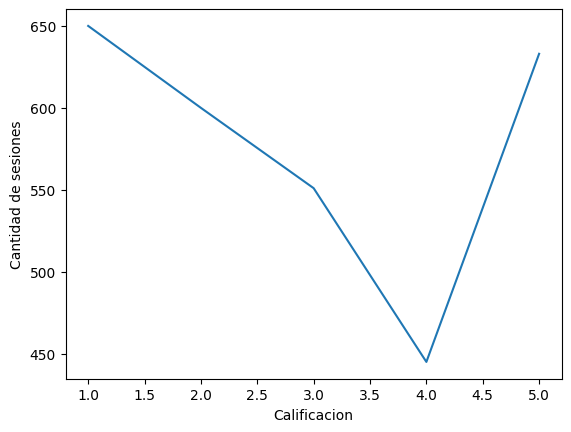

In [408]:
# Acá se genera el gráfico utilizando plot, con los datos obtenidos en el fragmento de codigo anterior
plt.plot(calificacion_feedback,cant_calificaciones)

plt.ylabel("Cantidad de sesiones")
plt.xlabel("Calificacion")
plt.show()

Se puede ver que la mayor calificacion es la de 1, teniendo una muy mala calificacion en primer lugar, seguido de las calificaciones que son 5 que si son una excelente califacion, pero siguiendo el top luego le sigue la calificacion 2 y 3, por lo que se puede apreciar que en general se tienen malas calificaciones

In [356]:
# Se preparan los datos para generar un gráfico de dispersion
duracion_sesion = data['session_duration'].values
cantidad_sesiones = data['number_of_sessions'].values

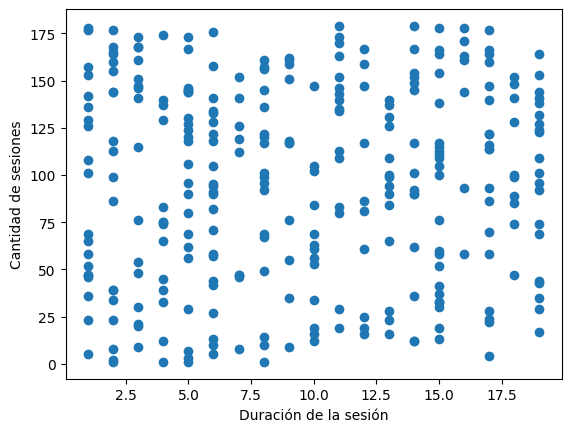

In [357]:
# Crear gráfico de dispersión entre duración de sesión y feedback
plt.scatter(cantidad_sesiones, duracion_sesion)  # Muestra cada par (duracion_sesion, feedback) como un punto

# Etiquetas de los ejes
plt.xlabel("Duración de la sesión")  # Etiqueta para el eje X
plt.ylabel("Cantidad de sesiones")               # Etiqueta para el eje Y

# Mostrar gráfico
plt.show()

In [358]:
# Se calcula la correlación para confirmar
correlation = data['session_duration'].corr(data['number_of_sessions'])
print("Correlación:", correlation)


Correlación: 0.058199267197197


Se observa claramente que no hay ninguna correlación entre las variables

In [359]:
# Se preparan los datos para el gráfico de barras
top_paises = data.groupby('country')['user_id'].count().sort_values(ascending=False).head()
paises = top_paises.index
usuarios_por_pais = top_paises.values
print(paises)
print(usuarios_por_pais)

Index(['Spain', 'Mexico', 'France', 'Germany', 'UK'], dtype='object', name='country')
[45 39 37 37 36]


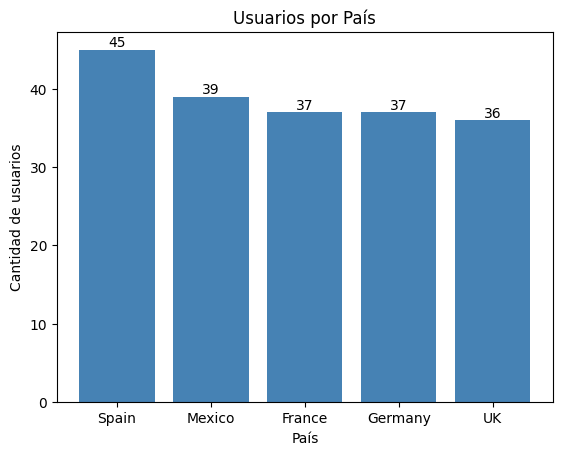

In [366]:
# Se crea un gráfico de barras para ver el salario medio de los data scientist segun el tamaño de las empresas
fig, ax = plt.subplots()

ax.bar(paises, usuarios_por_pais)

ax.set_ylabel('Cantidad de usuarios')
ax.set_xlabel('País')
ax.set_title('Usuarios por País')

# Guardar las barras en una variable
bars = ax.bar(paises, usuarios_por_pais, color='#4682B4')

# Añadir etiquetas de datos en cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra
    ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
            ha='center', va='bottom')  # Colocar la etiqueta

plt.show()

Se puede ver que España es el país con la mayor cantidad de usuarios, seguido por México y Francia respectivamente